In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/dataset/amul_self_made.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 
    zip.close()

File Name                                             Modified             Size
Brest Cancer Dataset.csv                       2019-07-09 23:53:20       125141
Extracting all the files now...
Done!


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from datetime import datetime as dt

#-----------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#----------------------------------------------------

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------------------------------

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#----------------------------------------------------

<Figure size 360x360 with 0 Axes>

In [4]:
df = pd.read_csv('amul_ads_cartooon.csv')
df.shape

(569, 32)

In [8]:
# 1 
concavity_mean = 1
for i in df['concavity_mean']:
  if i == 0:
    concavity_mean += 1
print(concavity_mean)

# 2 
concave_points_mean = 1
for i in df['concave points_mean']:
  if i == 0:
    concave_points_mean += 1
print(concave_points_mean)

# 2
symmetry_mean = 1
for i in df['symmetry_mean']:
  if i == 0:
    symmetry_mean += 1
print(symmetry_mean)

#only 14 zeros out of 569 data points is considerable

14
14
1


In [12]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 30].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (569, 30)
Y: (569,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.175,
                                                    random_state = 0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (469, 30)
X_test: (100, 30)
Y_train: (469,)
Y_test: (100,)


In [14]:
#Building our baseline dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()
clf.fit(X_train, Y_train)

#Predicting Results
y_pred = clf.predict(X_test)

#Calculating Resulta
print("CM: \n",confusion_matrix(Y_test, y_pred))
print("acc: {0}%".format(accuracy_score(Y_test, y_pred) * 100))

CM: 
 [[19 22]
 [17 42]]
acc: 61.0%


## K Nearest Neighbours Classifier

In [16]:
st=dt.now()
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)


knn_pred = knn.predict(X_test)

#Model Evaluation
kacc = accuracy_score(Y_test, knn_pred)
print('Accuracy Score: ' + str(kacc))

print('Precision Score: ' + str(precision_score(Y_test, knn_pred)))

print('Recall Score: ' + str(recall_score(Y_test, knn_pred)))

print('F1 Score: ' + str(f1_score(Y_test, knn_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, knn_pred)))

Time taken to complete random search:  0:00:00.011689
Accuracy Score: 0.94
Precision Score: 0.9491525423728814
Recall Score: 0.9491525423728814
F1 Score: 0.9491525423728814
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.95      0.95      0.95        59

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



## Liner Support Vector Classifier

In [17]:
st=dt.now()
l_svc = SVC(kernel = 'linear')
l_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

l_pred = l_svc.predict(X_test)

#Model Evaluation
lsvcacc = accuracy_score(Y_test, l_pred)
print('Accuracy Score: ' + str(lsvcacc))

print('Precision Score: ' + str(precision_score(Y_test, l_pred)))

print('Recall Score: ' + str(recall_score(Y_test, l_pred)))

print('F1 Score: ' + str(f1_score(Y_test, l_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, l_pred)))

Time taken to complete random search:  0:00:02.474460
Accuracy Score: 0.95
Precision Score: 0.9821428571428571
Recall Score: 0.9322033898305084
F1 Score: 0.9565217391304348
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.98      0.93      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



# Kernel SVM

In [18]:
st=dt.now()
gk_svc = SVC(kernel = 'rbf')
gk_svc.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

gk_pred = gk_svc.predict(X_test)

#Model Evaluation
ksvcaccacc = accuracy_score(Y_test, gk_pred)
print('Accuracy Score: ' + str(ksvcaccacc))

print('Precision Score: ' + str(precision_score(Y_test, gk_pred)))

print('Recall Score: ' + str(recall_score(Y_test, gk_pred)))

print('F1 Score: ' + str(f1_score(Y_test, gk_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, gk_pred)))

Time taken to complete random search:  0:00:00.033044
Accuracy Score: 0.59
Precision Score: 0.59
Recall Score: 1.0
F1 Score: 0.7421383647798743
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.59      1.00      0.74        59

    accuracy                           0.59       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.35      0.59      0.44       100



## Random Forest Classifierst


In [19]:
st=dt.now()
randomforest = RandomForestClassifier(n_estimators = 100, 
                                      random_state = 0)
randomforest.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

random_pred = randomforest.predict(X_test)

#Model Evaluation
rmacc = accuracy_score(Y_test, random_pred)
print('Accuracy Score: ' + str(rmacc))

print('Precision Score: ' + str(precision_score(Y_test, random_pred)))

print('Recall Score: ' + str(recall_score(Y_test, random_pred)))

print('F1 Score: ' + str(f1_score(Y_test, random_pred)))

print('Classification Report: \n' + str(classification_report(Y_test, random_pred)))

Time taken to complete random search:  0:00:00.167032
Accuracy Score: 0.96
Precision Score: 0.9661016949152542
Recall Score: 0.9661016949152542
F1 Score: 0.9661016949152542
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.97      0.97      0.97        59

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



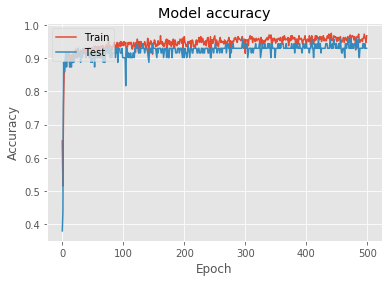

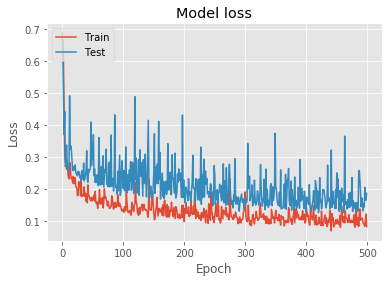

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [3]:
print('\n                             Accuracy')
print('                            -------------')

print('KNN Classifier             : {:.04} %'.format(kacc * 100))
print('Linear SVC                 : {:.04} %'.format(lsvcacc * 100))
print('Gaussian Kernel SVC        : {:.04} %'.format(ksvcaccacc * 100))
print('Random Forest Classifier   : {:.04} %'.format(rmacc * 100))


                             Accuracy
                            -------------
KNN Classifier             : 94.0 %
Linear SVC                 : 59.0 %
Gaussian Kernel SVC        : 95.0 %
Random Forest Classifier   : 90.0 %


## Saving Our Model and the Classifier

In [ ]:
#Random Forest Model
import pickle
filename = 'face_model.sav'
pickle.dump(gk_svc, open(filename, 'wb'))

In [ ]:
""